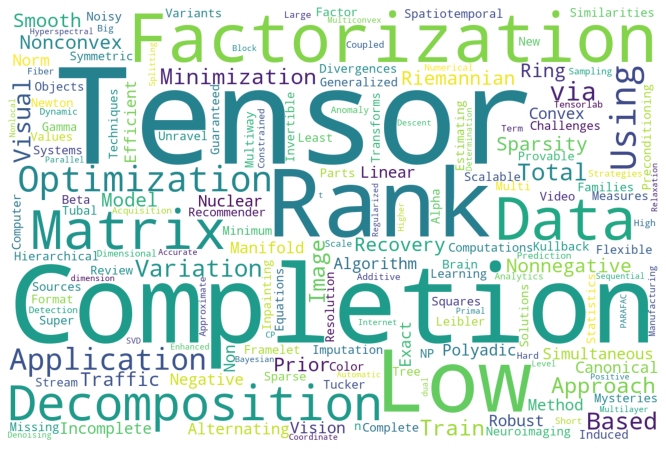

In [17]:
from urllib.request import urlopen
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

data=urlopen('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-Shiran-PS1/main/Problem%20Set%201/ps1_papers.txt').read().decode('utf-16').split('\n')
comment_words = ''
stopwords=set(STOPWORDS)
all_words=''
for line in data:all_words+=(line+' ')

plt.figure(1,figsize=(12,8))
wordcloud=WordCloud(width=1200,height=800,background_color='white',stopwords=stopwords,min_font_size=10,collocation_threshold=float('inf')).generate(all_words)                
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

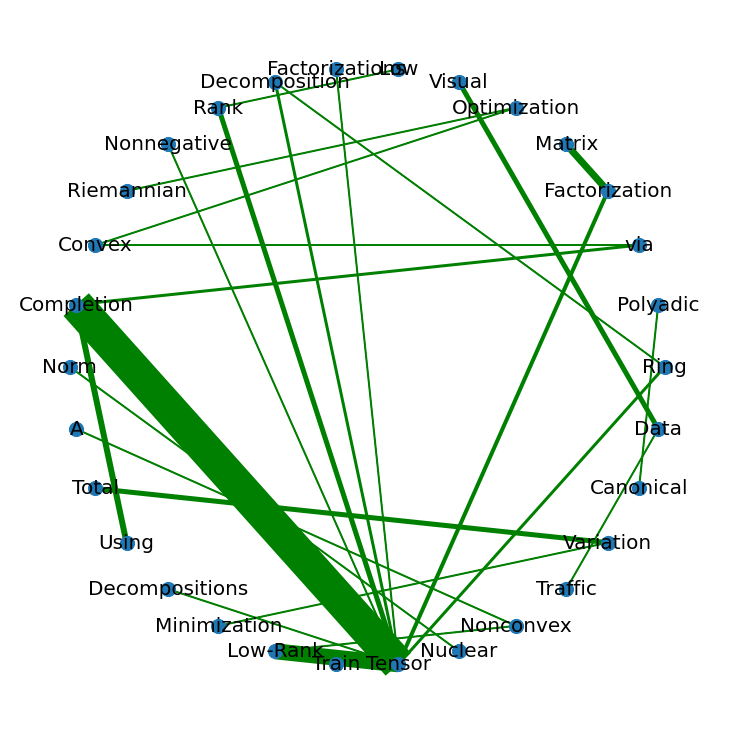

In [16]:
import networkx as nx

legit='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
freq={}
for line in data:
    words=line.split(' ')
    for i in range(len(words)):
        if words[i][-1] not in legit:words[i]=words[i][:-1]
    for i in range(len(words)-1):
        pair=(words[i],words[i+1]) if words[i]>words[i+1] else (words[i+1],words[i])
        if pair[0] not in stopwords and pair[1] not in stopwords:
            if pair not in freq.keys():freq[pair]=1
            else:freq[pair]+=1

threshold=2
newfreq={}
for edge in freq.keys():
    if freq[edge]>=threshold:newfreq[edge]=freq[edge]
freq=newfreq
nodes=set()
for edge in freq.keys():
    nodes.add(edge[0])
    nodes.add(edge[1])

graph=nx.Graph()
graph.add_nodes_from(nodes)
for edge in freq:graph.add_edge(edge[0],edge[1],weight=freq[edge])
plt.figure(1,figsize=(10,10))
pos=nx.circular_layout(graph)
nx.draw(graph,pos,with_labels=True,node_size=200,font_size=20)
for edge in graph.edges(data='weight'):nx.draw_networkx_edges(graph,pos,edgelist=[edge],width=edge[2],edge_color='g')
plt.show()